<h3>Отчёт по лабораторной раброте №3</h3>
<p><b>Выполнил:</b> студент групы РТ5-71 Саврасов П.А.</p>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold, LeaveOneOut, GridSearchCV
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import warnings
from ipywidgets import IntProgress
from IPython.display import display
warnings.filterwarnings('ignore')

<pre>В качестве даных для обучения и проверки качества обучения будем применять стандартный набор изображений
библиотеки skLearn. Размер изображений в данном наборе составляет 8 на 8 пикселей (64 пикселя всего).</pre>

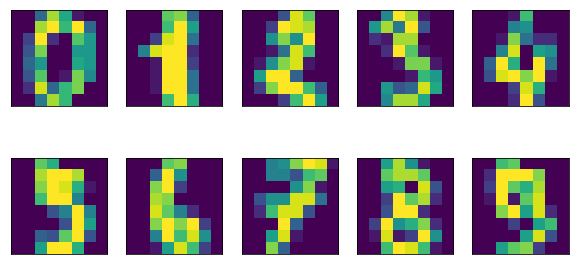

In [2]:
class progressVisualiser:
    def __init__(self, max_count):
        self.max_count = max_count
        self.f = IntProgress(min=0, max=max_count)
        display(self.f)
        
    def increment(self):
        self.f.value += 1
    
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
 subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
 ax.imshow(img)


<pre>Вызовем образец нейронной сети библиотеки skLearn чтобы посмотреть стандартные настройки</pre>

In [3]:
TrainX, TestX, TrainY, TestY = train_test_split(digits.data, digits.target, test_size=0.3, random_state = 1)
MLPClassifier()

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

<pre>В стандартном варианте нейросеть имеет следующие настройки:</pre>
<table style="border: 2px solid black">
    <tr style="border: 2px solid black">
        <th style="border: 1px solid black">Настройка</th>
        <th style="border: 1px solid black">Значение</th>
    </tr>
    <tr>
        <th style="border: 1px solid black">Число слоёв</th>
        <th style="border: 1px solid black">1</th>
    </tr>
        <tr>
        <th style="border: 1px solid black">Число перцептронов в слое</th>
        <th style="border: 1px solid black">100</th>
    </tr>
        <tr>
        <th style="border: 1px solid black">Функция активации</th>
        <th style="border: 1px solid black">ReLU Rectified Linear Unit (Полулинейный элемент)</th>
    </tr>
</table>

<pre>Для начала раассмоторим, как неёросеть покажет себя без дополнительных настроек</pre>

In [12]:
NeurNet1 = MLPClassifier()
NeurNet1.fit(TrainX,TrainY)
train_acc_result = accuracy_score(TrainY, NeurNet1.predict(TrainX))
test_acc_result = accuracy_score(TestY, NeurNet1.predict(TestX))
print("Результаты обучения:")
print("\tРезультат тестирования на обучающем наборе: ", round(train_acc_result * 100, 4), "%")
print("\tРезультат тестирования на тестовом наборе: ", round(test_acc_result * 100, 6), "%")

Результаты обучения:
	Результат тестирования на обучающем наборе:  100.0 %
	Результат тестирования на тестовом наборе:  97.777778 %


<pre>Как видно из результатов, нейросеть не переобучена, и показывает вполне неплохой результат.
Поспмотрим теперь как она себя поведёт при 1 слое, но с меньшим числом нейронов в слое.
Так же попробуем поменять настройки функции активации нейросети. В наборе предоставленых:
</pre>
<table style="border: 2px solid black">
    <tr style="border: 2px solid black">
        <th style="border: 1px solid black">Функция активации</th>
        <th style="border: 1px solid black">Название функции</th>
        <th style="border: 1px solid black">Уравнение</th>
    </tr>
    <tr>
        <th style="border: 1px solid black">identity</th>
        <th style="border: 1px solid black">Тождественная</th>
        <th style="border: 1px solid black"><i>f(x) = x</i></th>
    </tr>
        <tr>
        <th style="border: 1px solid black">logistic</th>
        <th style="border: 1px solid black">Логистическая (сигмоида)</th>
        <th style="border: 1px solid black"><i>f(x) = 1 / (1 + exp(-x))</i></th>
    </tr>
        <tr>
        <th style="border: 1px solid black">tanh</th>
        <th style="border: 1px solid black">Гиперболический тангенс</th>
        <th style="border: 1px solid black"><i>f(x) = tanh(x)</i></th>
    </tr>
    <tr>
        <th style="border: 1px solid black">relu</th>
        <th style="border: 1px solid black">Линейный выпрямитель(Полулинейный элемент)(англ. Rectified linear unit, ReLU) </th>
        <th style="border: 1px solid black"><i>f(x) = max(0, x)</i></th>
    </tr>   

</table>

In [5]:
relu_results = []
iden_results = []
logs_results = []
tanh_results = []
progVis = progressVisualiser(90)
neurons_num = range(10, 101)
for i in neurons_num:
    progVis.increment()
    NeurNet1 = MLPClassifier(hidden_layer_sizes=(i),activation='relu')
    NeurNet2 = MLPClassifier(hidden_layer_sizes=(i),activation='identity')
    NeurNet3 = MLPClassifier(hidden_layer_sizes=(i),activation='logistic')
    NeurNet4 = MLPClassifier(hidden_layer_sizes=(i),activation='tanh')
    NeurNet1.fit(TrainX, TrainY)
    NeurNet2.fit(TrainX, TrainY)
    NeurNet3.fit(TrainX, TrainY)
    NeurNet4.fit(TrainX, TrainY)
    relu_results.append(cross_val_score(NeurNet1,digits.data, digits.target, cv = 5).mean())
    iden_results.append(cross_val_score(NeurNet2,digits.data, digits.target, cv = 5).mean())
    logs_results.append(cross_val_score(NeurNet3,digits.data, digits.target, cv = 5).mean())
    tanh_results.append(cross_val_score(NeurNet4,digits.data, digits.target, cv = 5).mean())

IntProgress(value=0)

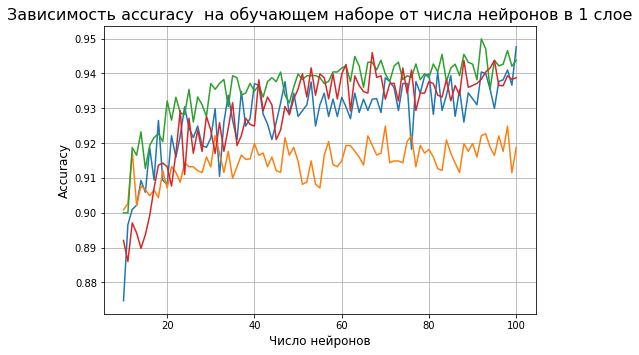

In [13]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(neurons_num, relu_results)
plt.plot(neurons_num, iden_results)
plt.plot(neurons_num, logs_results)
plt.plot(neurons_num, tanh_results)
plt.grid(True)
plt.title('Зависимость accuracy  на обучающем наборе от числа нейронов в 1 слое', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Число нейронов', fontsize=12)
plt.show()

</pre>
<table style="border: 2px solid black">
    <tr style="border: 2px solid black">
        <th style="border: 1px solid black">Функция активации</th>
        <th style="border: 1px solid black">Название функции</th>
        <th style="border: 1px solid black">Цвет на графике</th>
    </tr>
    <tr>
        <th style="border: 1px solid black">identity</th>
        <th style="border: 1px solid black">Тождественная</th>
        <th style="border: 1px solid black">Оранжевый</th>
    </tr>
        <tr>
        <th style="border: 1px solid black">logistic</th>
        <th style="border: 1px solid black">Логистическая (сигмоида)</th>
        <th style="border: 1px solid black">Зелёный</th>
    </tr>
        <tr>
        <th style="border: 1px solid black">tanh</th>
        <th style="border: 1px solid black">Гиперболический тангенс</th>
        <th style="border: 1px solid black">Красный</th>
    </tr>
    <tr>
        <th style="border: 1px solid black">relu</th>
        <th style="border: 1px solid black">Линейный выпрямитель(Полулинейный элемент)(англ. Rectified linear unit, ReLU) </th>
        <th style="border: 1px solid black">Синий</th>
    </tr>   
</table>

In [14]:
print("Наилучший резульат с функцией активации ReLU:")
print("\tЧисло нейронов: ", neurons_num[relu_results.index(max(relu_results))])
print("\tAccuracy: ", round(max(relu_results) * 100, 6), "%")
print("Наилучший резульат с функцией активации identity:")
print("\tЧисло нейронов: ", neurons_num[iden_results.index(max(iden_results))])
print("\tAccuracy: ", round(max(iden_results) * 100, 6), "%")
print("Наилучший резульат с функцией активации logistic:")
print("\tЧисло нейронов: ", neurons_num[logs_results.index(max(logs_results))])
print("\tAccuracy: ", round(max(logs_results) * 100, 6), "%")
print("Наилучший резульат с функцией активации tanh:")
print("\tЧисло нейронов: ", neurons_num[tanh_results.index(max(tanh_results))])
print("\tAccuracy: ", round(max(tanh_results) * 100, 6), "%")

Наилучший резульат с функцией активации ReLU:
	Число нейронов:  100
	Accuracy:  94.768494 %
Наилучший резульат с функцией активации identity:
	Число нейронов:  70
	Accuracy:  92.489438 %
Наилучший резульат с функцией активации logistic:
	Число нейронов:  92
	Accuracy:  94.994139 %
Наилучший резульат с функцией активации tanh:
	Число нейронов:  67
	Accuracy:  94.603028 %


<pre>Как видно из результатов, наилучшим образом показала себя нейросеть с  logistic и 92 нейронами.
Так же из графиков видно, что наилучшим образом показывала себя модель с логистической функцией активации.
Ещё из графика заметно, что особого прироста в качестве модели нет после 50 нейронов в первом слое.

Теперь попробуем изменить число слоёв до 2, с разным числом нейпронов в каждом слое.
Для облегчения вычислительной сложности оставим только один вариант функции активации.
пусть в первом слое значение меняется от 10 до 50 с шагом 10, а во втором от 10 до 50 с шагом 1.</pre>

In [15]:
results_10_n = []
results_20_n = []
results_30_n = []
results_40_n = []
results_50_n = []
progVis = progressVisualiser(40)
neurons_num = range(10, 51)
for i in neurons_num:
    progVis.increment()
    NeurNet1 = MLPClassifier(hidden_layer_sizes=(10, i),activation='logistic')
    NeurNet2 = MLPClassifier(hidden_layer_sizes=(20, i),activation='logistic')
    NeurNet3 = MLPClassifier(hidden_layer_sizes=(30, i),activation='logistic')
    NeurNet4 = MLPClassifier(hidden_layer_sizes=(40, i),activation='logistic')
    NeurNet5 = MLPClassifier(hidden_layer_sizes=(50, i),activation='logistic')
    NeurNet1.fit(TrainX, TrainY)
    NeurNet2.fit(TrainX, TrainY)
    NeurNet3.fit(TrainX, TrainY)
    NeurNet4.fit(TrainX, TrainY)
    NeurNet5.fit(TrainX, TrainY)
    results_10_n.append(cross_val_score(NeurNet1,digits.data, digits.target, cv = 5).mean())
    results_20_n.append(cross_val_score(NeurNet2,digits.data, digits.target, cv = 5).mean())
    results_30_n.append(cross_val_score(NeurNet3,digits.data, digits.target, cv = 5).mean())
    results_40_n.append(cross_val_score(NeurNet4,digits.data, digits.target, cv = 5).mean())
    results_50_n.append(cross_val_score(NeurNet5,digits.data, digits.target, cv = 5).mean())

IntProgress(value=0, max=40)

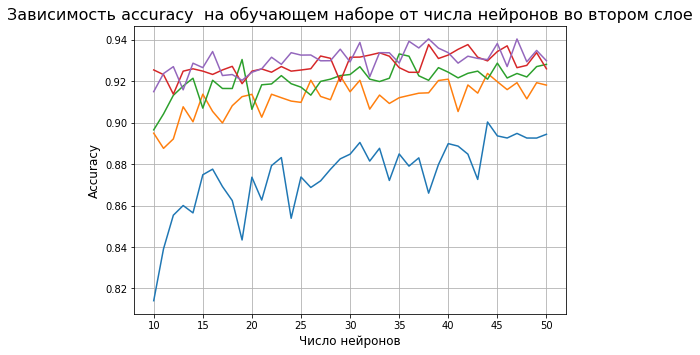

In [17]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(neurons_num, results_10_n)
plt.plot(neurons_num, results_20_n)
plt.plot(neurons_num, results_30_n)
plt.plot(neurons_num, results_40_n)
plt.plot(neurons_num, results_50_n)
plt.grid(True)
plt.title('Зависимость accuracy  на обучающем наборе от числа нейронов во втором слое', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Число нейронов', fontsize=12)
plt.show()

</pre>
<table style="border: 2px solid black">
    <tr style="border: 2px solid black">
        <th style="border: 1px solid black">Число нейронов в первом слое</th>
        <th style="border: 1px solid black">Цвет на графике</th>
    </tr>
    <tr>
        <th style="border: 1px solid black">10</th>
        <th style="border: 1px solid black">Синий</th>
    </tr>
        <tr>
        <th style="border: 1px solid black">20</th>
        <th style="border: 1px solid black">Оранжевый</th>
    </tr>
        <tr>
        <th style="border: 1px solid black">30</th>
        <th style="border: 1px solid black">Зелёный</th>
    </tr>
    <tr>
        <th style="border: 1px solid black">40</th>
        <th style="border: 1px solid black">Красный</th>
    </tr>
    <tr>
        <th style="border: 1px solid black">50</th>
        <th style="border: 1px solid black">Фиолетовый</th>
    </tr>
</table>    

In [18]:
print("Наилучший резульат с 10 нейронами в первом слое:")
print("\tЧисло нейронов во втором слое: ", neurons_num[results_10_n.index(max(results_10_n))])
print("\tAccuracy: ", round(max(results_10_n) * 100, 6), "%")
print("Наилучший резульат с 20 нейронами в первом слое:")
print("\tЧисло нейронов во втором слое: ", neurons_num[results_20_n.index(max(results_20_n))])
print("\tAccuracy: ", round(max(results_20_n) * 100, 6), "%")
print("Наилучший резульат с 30 нейронами в первом слое:")
print("\tЧисло нейронов во втором слое: ", neurons_num[results_30_n.index(max(results_30_n))])
print("\tAccuracy: ", round(max(results_30_n) * 100, 6), "%")
print("Наилучший резульат с 40 нейронами в первом слое:")
print("\tЧисло нейронов во втором слое: ", neurons_num[results_40_n.index(max(results_40_n))])
print("\tAccuracy: ", round(max(results_40_n) * 100, 6), "%")
print("Наилучший резульат с 50 нейронами в первом слое:")
print("\tЧисло нейронов во втором слое: ", neurons_num[results_50_n.index(max(results_50_n))])
print("\tAccuracy: ", round(max(results_50_n) * 100, 6), "%")

Наилучший резульат с 10 нейронами в первом слое:
	Число нейронов:  44
	Accuracy:  90.032903 %
Наилучший резульат с 20 нейронами в первом слое:
	Число нейронов:  44
	Accuracy:  92.378038 %
Наилучший резульат с 30 нейронами в первом слое:
	Число нейронов:  35
	Accuracy:  93.320661 %
Наилучший резульат с 40 нейронами в первом слое:
	Число нейронов:  38
	Accuracy:  93.771674 %
Наилучший резульат с 50 нейронами в первом слое:
	Число нейронов:  38
	Accuracy:  94.045519 %


Сделаем выводы по полученным графикам:
1. В случае 1 скрытого слоя качество модели начинает рости вместе с ростом числа нейронов в этом слое.
2. В случае 2 скрытых слоёв и малым числом нейронов в первом слое изменение числа нейронов во втором слое даёт ощутимый прирост качества модели, в сслучае же большого числа нейронов в первом слое изменение числа нейронов во втором слое практически не влияет на качество модели. 
3. Модель с большим числом скрытых слоёв показывает лучшие результаты.

На основе размышлений выше обучим ещё 10 моделей с разным числом слоёв и 50 нейронами в каждом слое, чтобы отследить изменение качества получаемой модели

In [16]:
layers_num = [1,2,3,4,5,6,7,8,9,10]
results_layers = []
results_layers_train = []
progVis = progressVisualiser(10)
for layers in layers_num:
    progVis.increment()
    neurons_num = []
    for i in range (0, layers):
        neurons_num.append(50)
    NeurNet6 = MLPClassifier(hidden_layer_sizes=tuple(neurons_num),activation='logistic')
    NeurNet6.fit(TrainX, TrainY)
    results_layers_train.append(accuracy_score(TrainY, NeurNet6.predict(TrainX)))
    results_layers.append(cross_val_score(NeurNet6,digits.data, digits.target, cv = 5).mean())   
    

IntProgress(value=0, max=10)

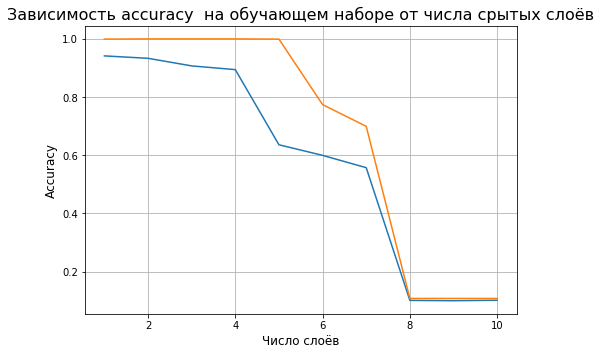

In [21]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(layers_num, results_layers)
plt.plot(layers_num, results_layers_train)
plt.grid(True)
plt.title('Зависимость accuracy  на обучающем наборе от числа срытых слоёв', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Число слоёв', fontsize=12)
plt.show()

Как видно из пеолученного графика, модели с большим числом слоёв начинают работать некорректно.
Также нвачиная от 5 слоёв проявляется эффект переобучения, а с 7 слоёв качество модели крайне сильно падает.

<h5>Выводы:</h5>

1. Модели с 1 скрытым слоем показывают себя лучше при большем числе нейронов, однако если их больше 50, качество модели растёт незначительно.
2. В случае моделит с 2 скрытыми слоями увеличение числа нейронов в первом слое приводит к тому, что увеличение числа нейронов во втором слое не меняет особенно качество модели.
3. Увеличение числа слоёв не улучшает модель постоянно, а только лишь до определённого значения (4 слоёв). Если ещё увеличивать число слоёв качество модели начнёт сильно падать и проявится эффект переобучения.
4. Наилучшим образом показала себя нейросеть с логистической функцией активации.